<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.5
## Feature Selection

### Data

**Predict the onset of diabetes based on diagnostic measures.**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database/download)

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Load Data

In [6]:
# Read Data
diabetes_csv = 'diabetes.csv'
df = pd.read_csv('diabetes.csv')


#### 2. Perform EDA

Perform EDA. Check Null Values. Impute if necessary.

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# 17 pregnancies!!!!!!!!!!!!!!!!!!
# BMI 67!
# BP, glucose, skin thickness, insulin BMI all have 0 as min....could impute with median

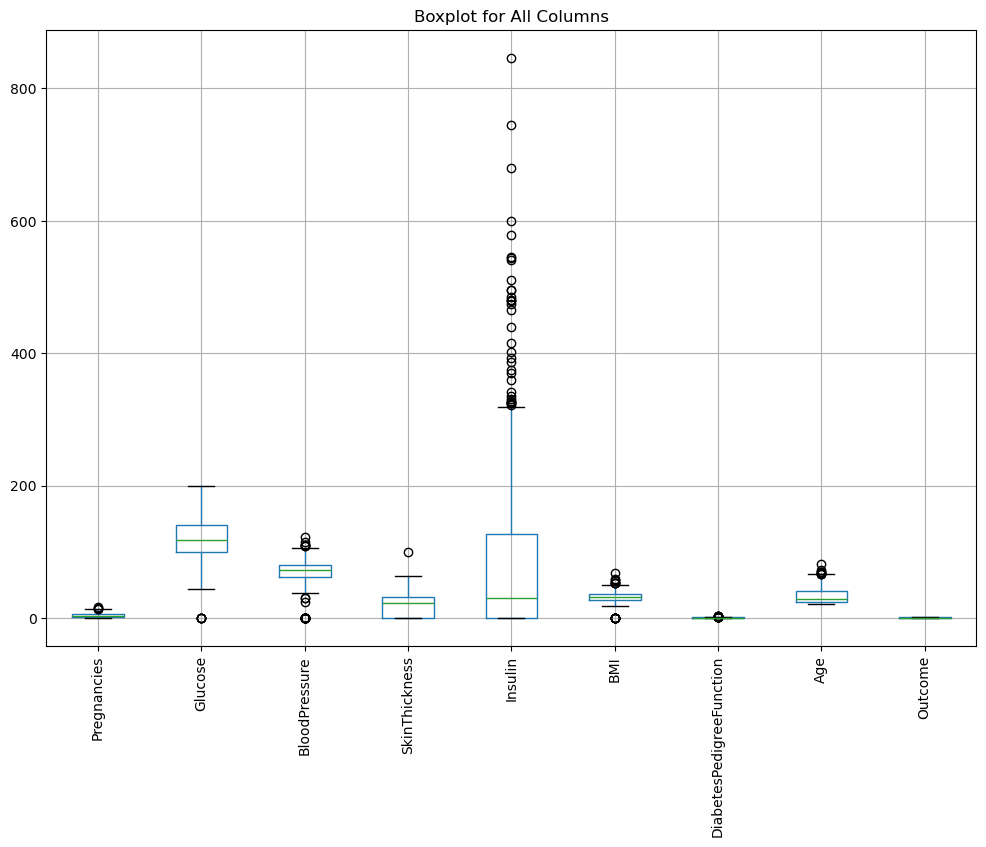

In [14]:
# for outliers
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Boxplot for All Columns')
plt.show()

#### 3. Set Target

- Set `Outcome` as target.
- Set Features

In [16]:
X = df.drop(columns = ['Outcome']) # features

y = df['Outcome'] # target

#### 4. Select Feature

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

##### 4.1 Univariate Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- SelectKBest removes all but the  highest scoring features
- Use sklearn.feature_selection.chi2 as score function
    > Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.


More Reads:
[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)

- Create an instance of SelectKBest
    - Use sklearn.feature_selection.chi2 as score_func
    - Use k of your choice
- Fit X, y
- Find top 4 features
- Transform features to a DataFrame

In [18]:
# Create an instance of SelectKBest

from sklearn.feature_selection import SelectKBest, chi2

# Create an instance of SelectKBest with chi2 as the score function
select_k_best = SelectKBest(score_func=chi2, k=4)

In [42]:
# Fit

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Create an instance of SelectKBest with chi2 as the score function
select_k_best = SelectKBest(score_func=chi2, k=4)

# Fit SelectKBest on the scaled data
X_selected = select_k_best.fit_transform(X, y)

feature_columns = [c for c in df.columns if c != "Outcome"]
scores_df = pd.DataFrame(select_k_best.scores_, index=feature_columns, columns=['Score'])


print(scores)

                                    0
Pregnancies                111.519691
Glucose                   1411.887041
BloodPressure               17.605373
SkinThickness               53.108040
Insulin                   2175.565273
BMI                        127.669343
DiabetesPedigreeFunction     5.392682
Age                        181.303689


In [46]:
# Print Score
top_4_features = scores_df.sort_values(by='Score', ascending=False).head(4) 

print(top_4_features)

# Find Top 4 Features

# Get the names of the top 4 features
#top_feature_indices = select_k_best.get_support(indices=True)

# Get the scores of the top k features
#X_top_4 = feature_scores[top_feature_indices]

#print(top_feature_scores)
#print(X_top_4)

               Score
Insulin  2175.565273
Glucose  1411.887041
Age       181.303689
BMI       127.669343


In [48]:
# Transform X to Features
# Transform X to keep only the top k features
X_top_4 = select_k_best.transform(X)
print(X_top_4)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [ ]:
# Transform features to a dataframe

# Convert the selected features to a DataFrame
X_top_4_df = pd.DataFrame(X_top_4, columns=top_feature_indices)
X_top_4_df.head()

##### 4.2 Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

More Reads:
[Recursive feature elimination](https://scikit-learn.org/stable/modules/feature_selection.html)

- Use RFE to extract feature
    - use LogisticRegression as estimator
    - Number of n_features_to_select as of your choice
- Fit X, y to RFE
- Find Selected Features

In [ ]:
# ANSWER

In [ ]:
# Print Score
# Find Features



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



